In [9]:
# Comparative Analysis - Decision Tree Performance Across Datasets
# Team Members: Van Chien, Van Khanh, Cat Huynh, Duc Khai
# Course: Introduction to Artificial Intelligence - CS14003

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings

warnings.filterwarnings("ignore")

# Set style for better plots
plt.style.use("default")
sns.set_palette("husl")

print("=" * 80)
print("COMPARATIVE ANALYSIS: DECISION TREE PERFORMANCE ACROSS THREE DATASETS")
print("=" * 80)

COMPARATIVE ANALYSIS: DECISION TREE PERFORMANCE ACROSS THREE DATASETS



1. DATASET CHARACTERISTICS COMPARISON

Dataset Characteristics Summary:
        Dataset              Domain  Samples  Original Features  Final Features  Classes  Class Type  Imbalance Ratio  Missing Values      Feature Types Complexity
  Heart Disease   Medical Diagnosis      297                 13              13        2      Binary             1.17    Minimal (2%)              Mixed        Low
Palmer Penguins Ecological Research      344                  7               8        3 Multi-class             2.24 Moderate (3.2%) Mixed + Geographic        Low
    Dermatology   Medical Diagnosis      366                 34             109        6 Multi-class             5.60   Minimal (<1%)     Medical Scales       High


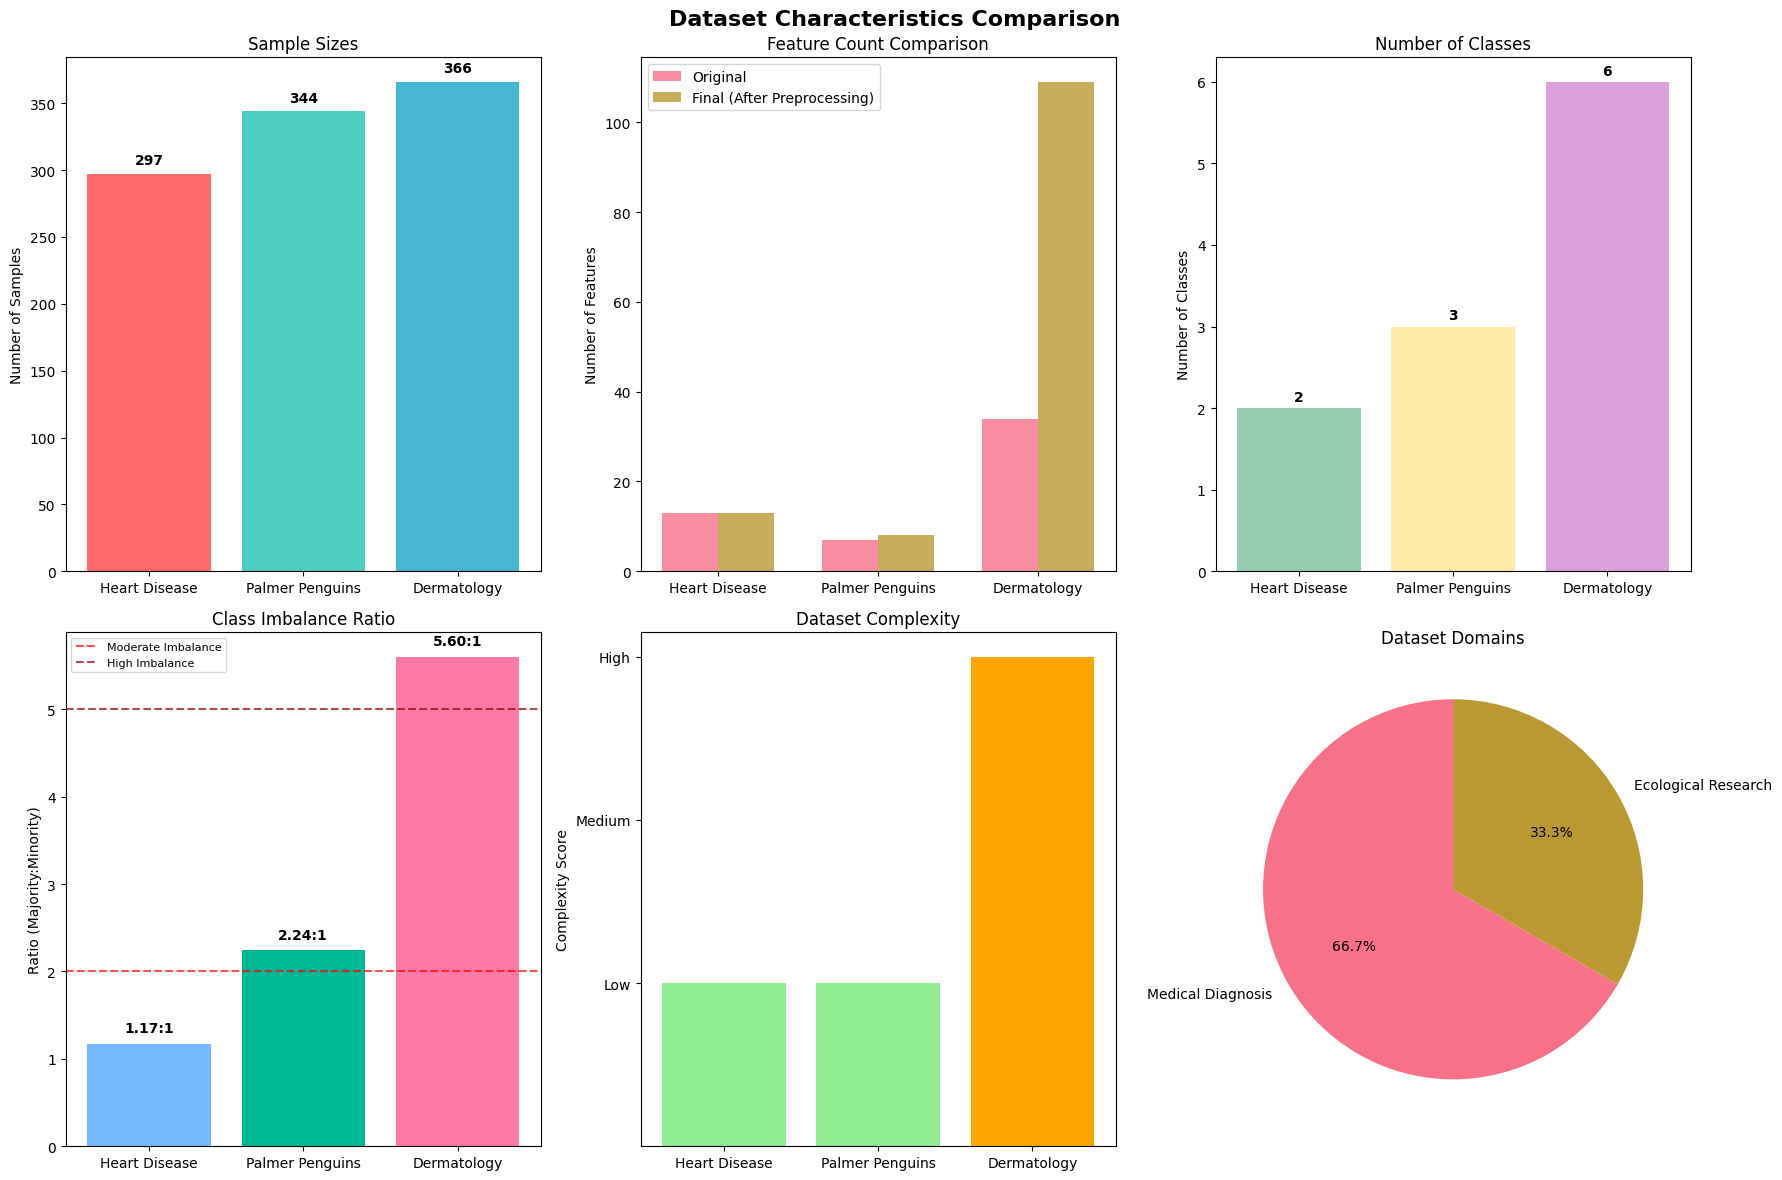

In [10]:
# =============================================================================
# 1. DATASET CHARACTERISTICS COMPARISON
# =============================================================================

print("\n" + "=" * 60)
print("1. DATASET CHARACTERISTICS COMPARISON")
print("=" * 60)

# Define dataset characteristics
datasets_info = {
    "Dataset": ["Heart Disease", "Palmer Penguins", "Dermatology"],
    "Domain": ["Medical Diagnosis", "Ecological Research", "Medical Diagnosis"],
    "Samples": [297, 344, 366],
    "Original Features": [13, 7, 34],
    "Final Features": [13, 8, 109],
    "Classes": [2, 3, 6],
    "Class Type": ["Binary", "Multi-class", "Multi-class"],
    "Imbalance Ratio": [1.17, 2.24, 5.60],
    "Missing Values": ["Minimal (2%)", "Moderate (3.2%)", "Minimal (<1%)"],
    "Feature Types": ["Mixed", "Mixed + Geographic", "Medical Scales"],
    "Complexity": ["Low", "Low", "High"],
}

comparison_df = pd.DataFrame(datasets_info)
print("\nDataset Characteristics Summary:")
print(comparison_df.to_string(index=False))

# Visualize dataset characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Dataset Characteristics Comparison", fontsize=16, fontweight="bold")

# 1. Sample sizes
axes[0, 0].bar(
    comparison_df["Dataset"],
    comparison_df["Samples"],
    color=["#FF6B6B", "#4ECDC4", "#45B7D1"],
)
axes[0, 0].set_title("Sample Sizes")
axes[0, 0].set_ylabel("Number of Samples")
for i, v in enumerate(comparison_df["Samples"]):
    axes[0, 0].text(i, v + 5, str(v), ha="center", va="bottom", fontweight="bold")

# 2. Number of features
feature_data = pd.DataFrame(
    {
        "Dataset": comparison_df["Dataset"],
        "Original": comparison_df["Original Features"],
        "Final": comparison_df["Final Features"],
    }
)
x = np.arange(len(comparison_df["Dataset"]))
width = 0.35
axes[0, 1].bar(
    x - width / 2, feature_data["Original"], width, label="Original", alpha=0.8
)
axes[0, 1].bar(
    x + width / 2,
    feature_data["Final"],
    width,
    label="Final (After Preprocessing)",
    alpha=0.8,
)
axes[0, 1].set_title("Feature Count Comparison")
axes[0, 1].set_ylabel("Number of Features")
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(comparison_df["Dataset"])
axes[0, 1].legend()

# 3. Number of classes
axes[0, 2].bar(
    comparison_df["Dataset"],
    comparison_df["Classes"],
    color=["#96CEB4", "#FFEAA7", "#DDA0DD"],
)
axes[0, 2].set_title("Number of Classes")
axes[0, 2].set_ylabel("Number of Classes")
for i, v in enumerate(comparison_df["Classes"]):
    axes[0, 2].text(i, v + 0.05, str(v), ha="center", va="bottom", fontweight="bold")

# 4. Class imbalance ratio
axes[1, 0].bar(
    comparison_df["Dataset"],
    comparison_df["Imbalance Ratio"],
    color=["#74B9FF", "#00B894", "#FD79A8"],
)
axes[1, 0].set_title("Class Imbalance Ratio")
axes[1, 0].set_ylabel("Ratio (Majority:Minority)")
axes[1, 0].axhline(
    y=2, color="red", linestyle="--", alpha=0.7, label="Moderate Imbalance"
)
axes[1, 0].axhline(
    y=5, color="darkred", linestyle="--", alpha=0.7, label="High Imbalance"
)
axes[1, 0].legend(fontsize=8)
for i, v in enumerate(comparison_df["Imbalance Ratio"]):
    axes[1, 0].text(
        i, v + 0.1, f"{v:.2f}:1", ha="center", va="bottom", fontweight="bold"
    )

# 5. Dataset complexity visualization
complexity_scores = {"Low": 1, "Low": 1, "High": 3}  # Heart, Penguins, Dermatology
complexity_values = [1, 1, 3]
colors = ["lightgreen", "lightgreen", "orange"]
axes[1, 1].bar(comparison_df["Dataset"], complexity_values, color=colors)
axes[1, 1].set_title("Dataset Complexity")
axes[1, 1].set_ylabel("Complexity Score")
axes[1, 1].set_yticks([1, 2, 3])
axes[1, 1].set_yticklabels(["Low", "Medium", "High"])

# 6. Domain distribution
domains = comparison_df["Domain"].value_counts()
axes[1, 2].pie(domains.values, labels=domains.index, autopct="%1.1f%%", startangle=90)
axes[1, 2].set_title("Dataset Domains")

plt.tight_layout()
plt.savefig(
    "../../visualizations/comparative_analysis/dataset_characteristics.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


2. PERFORMANCE COMPARISON ACROSS TRAIN/TEST SPLITS


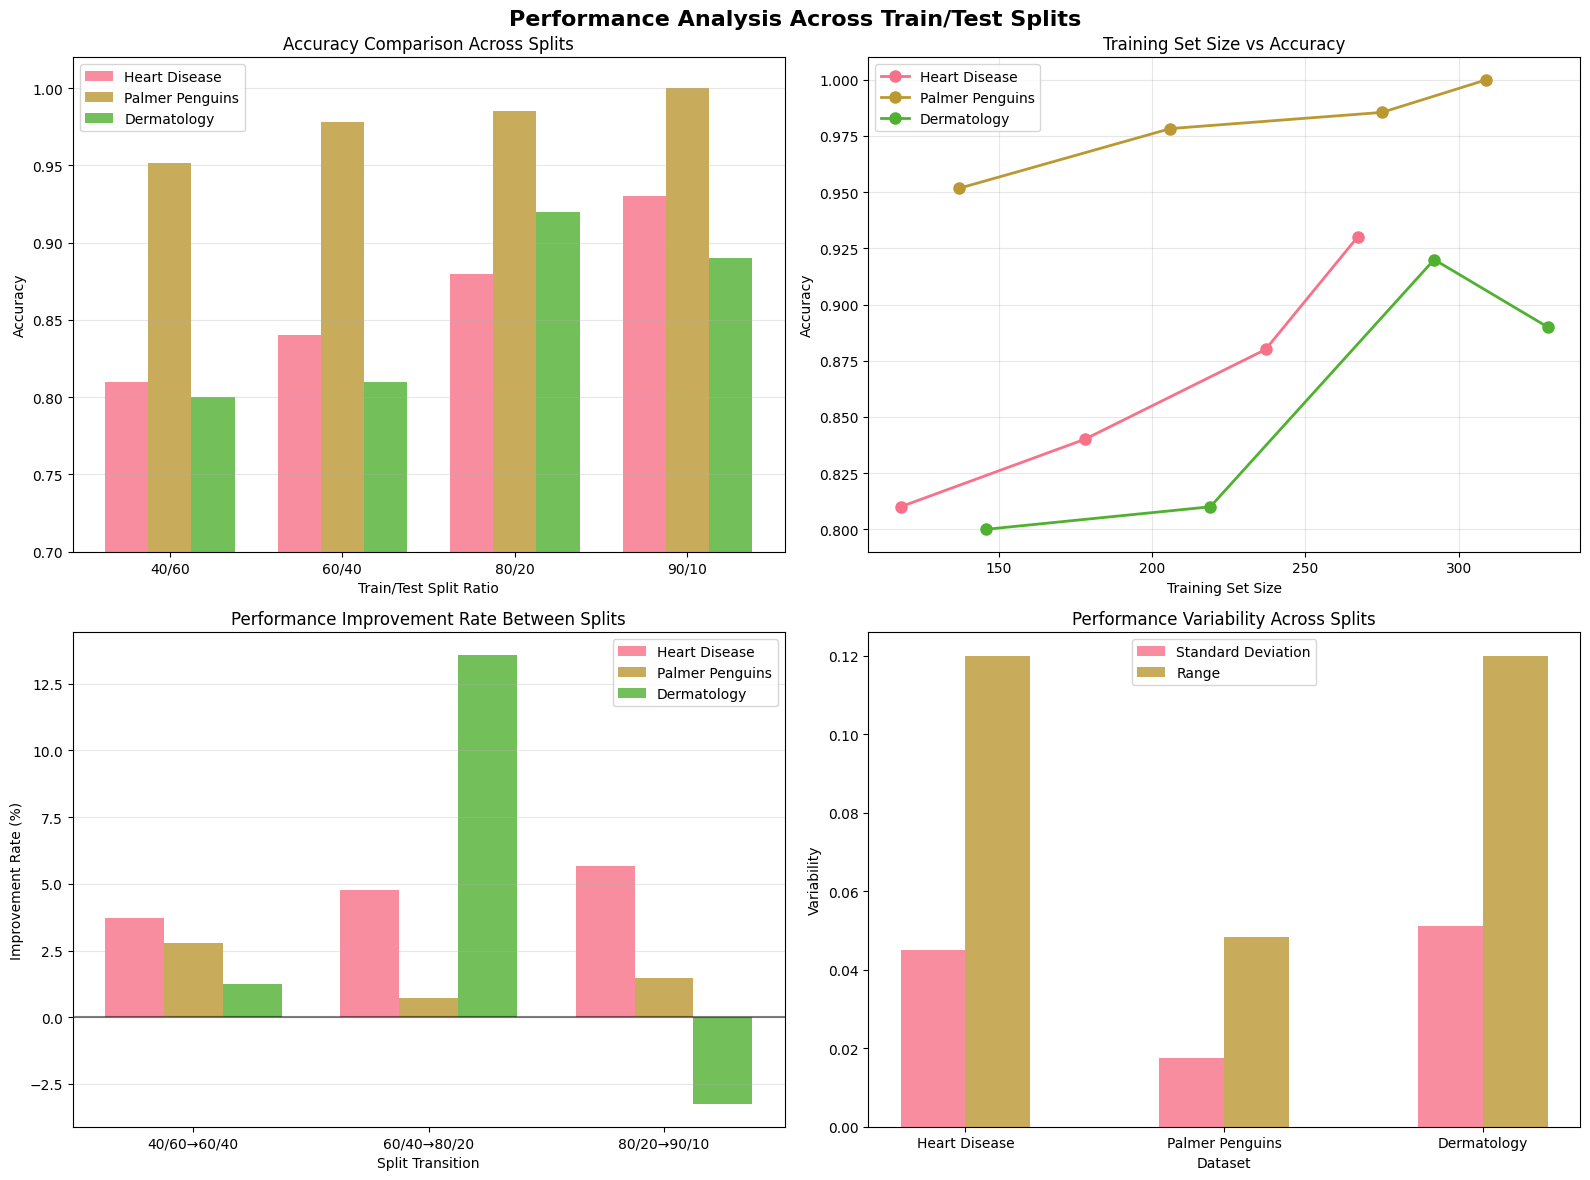


Performance Summary Table:
        Dataset Split  Train Size  Test Size Accuracy Accuracy %
  Heart Disease 40/60         118        179   0.8100     81.00%
  Heart Disease 60/40         178        119   0.8400     84.00%
  Heart Disease 80/20         237         60   0.8800     88.00%
  Heart Disease 90/10         267         30   0.9300     93.00%
Palmer Penguins 40/60         137        207   0.9517     95.17%
Palmer Penguins 60/40         206        138   0.9783     97.83%
Palmer Penguins 80/20         275         69   0.9855     98.55%
Palmer Penguins 90/10         309         35   1.0000    100.00%
    Dermatology 40/60         146        220   0.8000     80.00%
    Dermatology 60/40         219        147   0.8100     81.00%
    Dermatology 80/20         292         74   0.9200     92.00%
    Dermatology 90/10         329         37   0.8900     89.00%


In [11]:
# =============================================================================
# 2. PERFORMANCE COMPARISON ACROSS TRAIN/TEST SPLITS
# =============================================================================

print("\n" + "=" * 60)
print("2. PERFORMANCE COMPARISON ACROSS TRAIN/TEST SPLITS")
print("=" * 60)

# Performance data for all datasets
performance_data = {
    "Heart Disease": {
        "splits": ["40/60", "60/40", "80/20", "90/10"],
        "train_sizes": [118, 178, 237, 267],
        "test_sizes": [179, 119, 60, 30],
        "accuracies": [0.8100, 0.8400, 0.8800, 0.9300],
    },
    "Palmer Penguins": {
        "splits": ["40/60", "60/40", "80/20", "90/10"],
        "train_sizes": [137, 206, 275, 309],
        "test_sizes": [207, 138, 69, 35],
        "accuracies": [0.9517, 0.9783, 0.9855, 1.0000],
    },
    "Dermatology": {
        "splits": ["40/60", "60/40", "80/20", "90/10"],
        "train_sizes": [146, 219, 292, 329],
        "test_sizes": [220, 147, 74, 37],
        "accuracies": [0.8000, 0.8100, 0.9200, 0.8900],
    },
}

# Create performance comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(
    "Performance Analysis Across Train/Test Splits", fontsize=16, fontweight="bold"
)

# 1. Accuracy comparison across splits
split_labels = ["40/60", "60/40", "80/20", "90/10"]
x = np.arange(len(split_labels))
width = 0.25

for i, (dataset, data) in enumerate(performance_data.items()):
    axes[0, 0].bar(x + i * width, data["accuracies"], width, label=dataset, alpha=0.8)

axes[0, 0].set_title("Accuracy Comparison Across Splits")
axes[0, 0].set_xlabel("Train/Test Split Ratio")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_xticks(x + width)
axes[0, 0].set_xticklabels(split_labels)
axes[0, 0].legend()
axes[0, 0].grid(axis="y", alpha=0.3)
axes[0, 0].set_ylim(0.7, 1.02)

# 2. Training set size vs accuracy
for dataset, data in performance_data.items():
    axes[0, 1].plot(
        data["train_sizes"],
        data["accuracies"],
        "o-",
        label=dataset,
        linewidth=2,
        markersize=8,
    )

axes[0, 1].set_title("Training Set Size vs Accuracy")
axes[0, 1].set_xlabel("Training Set Size")
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Performance improvement rate
improvement_rates = {}
for dataset, data in performance_data.items():
    rates = []
    for i in range(1, len(data["accuracies"])):
        rate = (
            (data["accuracies"][i] - data["accuracies"][i - 1])
            / data["accuracies"][i - 1]
            * 100
        )
        rates.append(rate)
    improvement_rates[dataset] = rates

split_transitions = ["40/60→60/40", "60/40→80/20", "80/20→90/10"]
x = np.arange(len(split_transitions))

for i, (dataset, rates) in enumerate(improvement_rates.items()):
    axes[1, 0].bar(x + i * width, rates, width, label=dataset, alpha=0.8)

axes[1, 0].set_title("Performance Improvement Rate Between Splits")
axes[1, 0].set_xlabel("Split Transition")
axes[1, 0].set_ylabel("Improvement Rate (%)")
axes[1, 0].set_xticks(x + width)
axes[1, 0].set_xticklabels(split_transitions)
axes[1, 0].legend()
axes[1, 0].axhline(y=0, color="black", linestyle="-", alpha=0.5)
axes[1, 0].grid(axis="y", alpha=0.3)

# 4. Performance variability
variabilities = {}
for dataset, data in performance_data.items():
    std_dev = np.std(data["accuracies"])
    range_val = max(data["accuracies"]) - min(data["accuracies"])
    variabilities[dataset] = {"std": std_dev, "range": range_val}

datasets = list(variabilities.keys())
std_devs = [variabilities[d]["std"] for d in datasets]
ranges = [variabilities[d]["range"] for d in datasets]

x = np.arange(len(datasets))
axes[1, 1].bar(x - width / 2, std_devs, width, label="Standard Deviation", alpha=0.8)
axes[1, 1].bar(x + width / 2, ranges, width, label="Range", alpha=0.8)
axes[1, 1].set_title("Performance Variability Across Splits")
axes[1, 1].set_xlabel("Dataset")
axes[1, 1].set_ylabel("Variability")
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(datasets)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig(
    "../../visualizations/comparative_analysis/performance_comparison.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

# Performance summary table
print("\nPerformance Summary Table:")
summary_data = []
for dataset, data in performance_data.items():
    for i, split in enumerate(data["splits"]):
        summary_data.append(
            {
                "Dataset": dataset,
                "Split": split,
                "Train Size": data["train_sizes"][i],
                "Test Size": data["test_sizes"][i],
                "Accuracy": f"{data['accuracies'][i]:.4f}",
                "Accuracy %": f"{data['accuracies'][i]*100:.2f}%",
            }
        )

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


3. DEPTH ANALYSIS COMPARISON


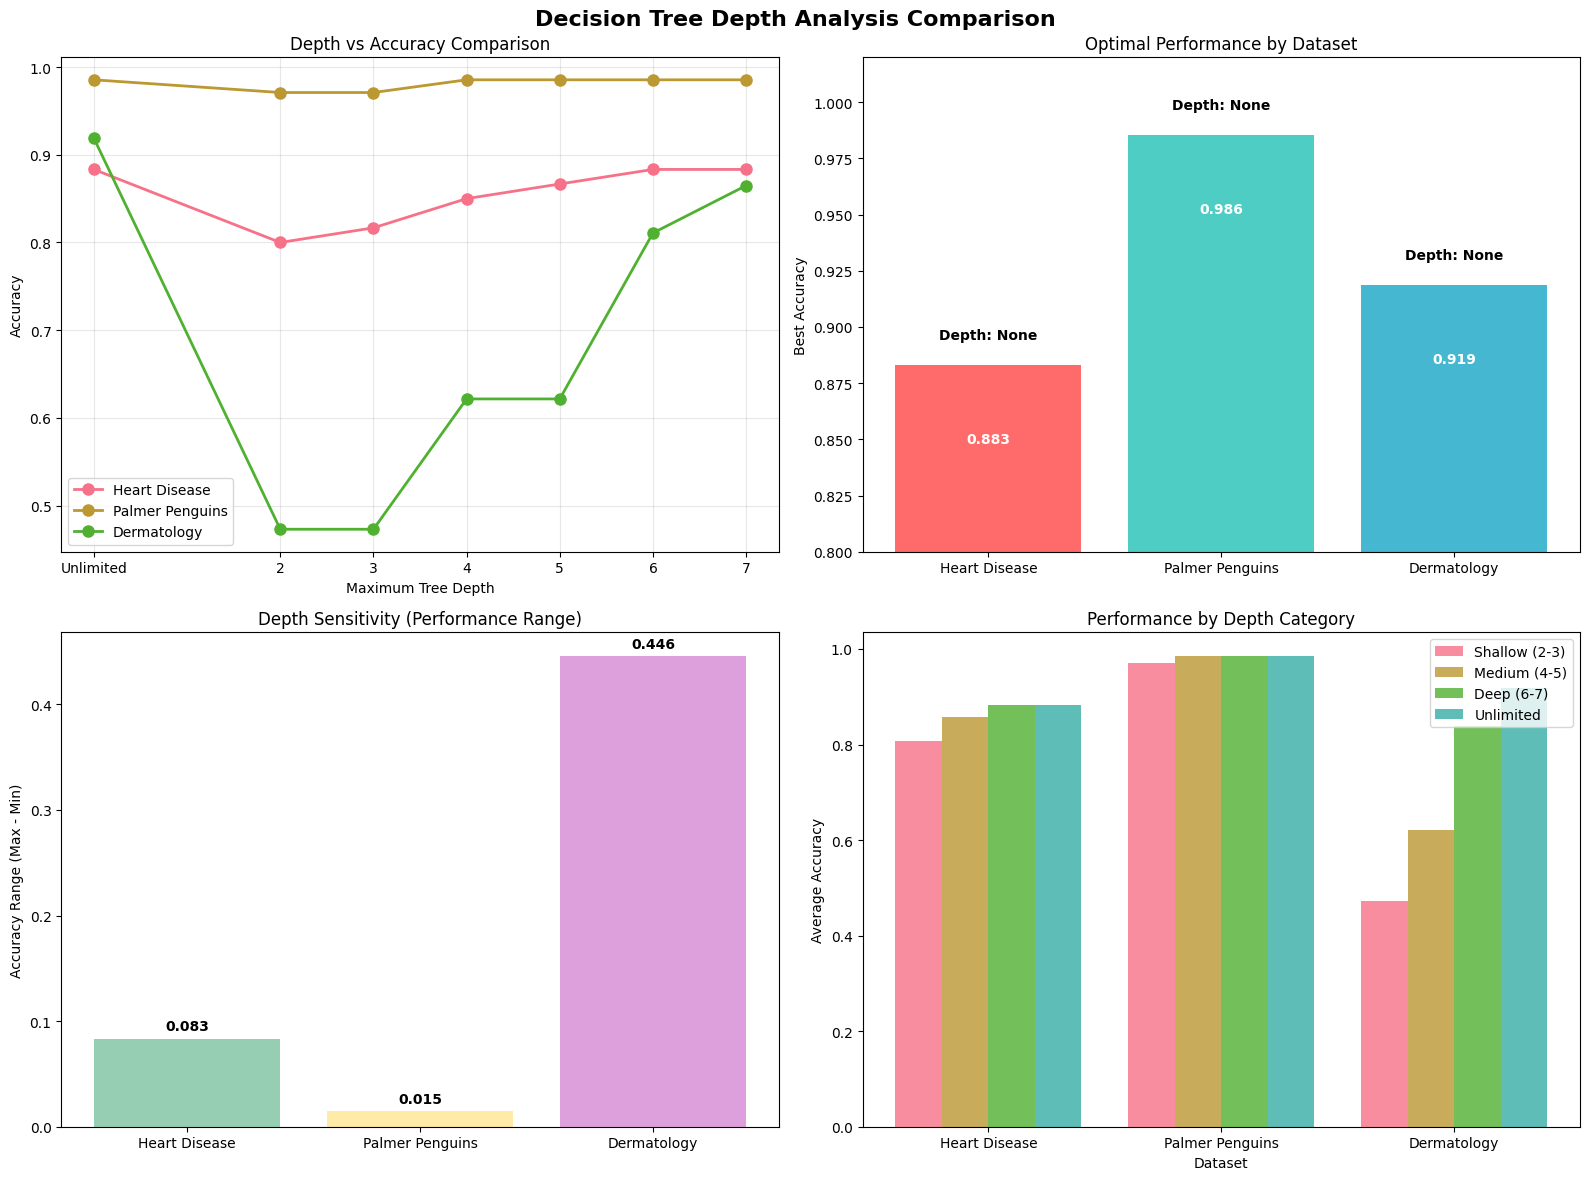


Depth Analysis Summary:
        Dataset Optimal Depth Best Accuracy Performance Range Sensitivity
  Heart Disease          None        0.8833            0.0833         Low
Palmer Penguins          None        0.9855            0.0145         Low
    Dermatology          None        0.9189            0.4459        High


In [12]:
# =============================================================================
# 3. DEPTH ANALYSIS COMPARISON
# =============================================================================

print("\n" + "=" * 60)
print("3. DEPTH ANALYSIS COMPARISON")
print("=" * 60)

# Depth analysis data (80/20 split)
depth_data = {
    "Heart Disease": {
        "depths": ["None", "2", "3", "4", "5", "6", "7"],
        "accuracies": [0.8833, 0.8000, 0.8167, 0.8500, 0.8667, 0.8833, 0.8833],
    },
    "Palmer Penguins": {
        "depths": ["None", "2", "3", "4", "5", "6", "7"],
        "accuracies": [0.9855, 0.9710, 0.9710, 0.9855, 0.9855, 0.9855, 0.9855],
    },
    "Dermatology": {
        "depths": ["None", "2", "3", "4", "5", "6", "7"],
        "accuracies": [0.9189, 0.4730, 0.4730, 0.6216, 0.6216, 0.8108, 0.8649],
    },
}

# Create depth analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Decision Tree Depth Analysis Comparison", fontsize=16, fontweight="bold")

# 1. Depth vs Accuracy for all datasets
depth_labels = ["Unlimited", "2", "3", "4", "5", "6", "7"]
x_positions = [0, 2, 3, 4, 5, 6, 7]

for dataset, data in depth_data.items():
    axes[0, 0].plot(
        x_positions, data["accuracies"], "o-", label=dataset, linewidth=2, markersize=8
    )

axes[0, 0].set_title("Depth vs Accuracy Comparison")
axes[0, 0].set_xlabel("Maximum Tree Depth")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_xticks(x_positions)
axes[0, 0].set_xticklabels(depth_labels)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Optimal depth identification
optimal_depths = {}
for dataset, data in depth_data.items():
    max_acc = max(data["accuracies"])
    optimal_idx = data["accuracies"].index(max_acc)
    optimal_depths[dataset] = {
        "depth": data["depths"][optimal_idx],
        "accuracy": max_acc,
    }

datasets = list(optimal_depths.keys())
opt_accuracies = [optimal_depths[d]["accuracy"] for d in datasets]
opt_depth_labels = [optimal_depths[d]["depth"] for d in datasets]

bars = axes[0, 1].bar(datasets, opt_accuracies, color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
axes[0, 1].set_title("Optimal Performance by Dataset")
axes[0, 1].set_ylabel("Best Accuracy")
axes[0, 1].set_ylim(0.8, 1.02)

# Add depth labels on bars
for i, (bar, depth) in enumerate(zip(bars, opt_depth_labels)):
    height = bar.get_height()
    axes[0, 1].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.01,
        f"Depth: {depth}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )
    axes[0, 1].text(
        bar.get_x() + bar.get_width() / 2.0,
        height - 0.03,
        f"{height:.3f}",
        ha="center",
        va="top",
        fontweight="bold",
        color="white",
    )

# 3. Depth sensitivity analysis
depth_ranges = {}
for dataset, data in depth_data.items():
    acc_range = max(data["accuracies"]) - min(data["accuracies"])
    depth_ranges[dataset] = acc_range

datasets = list(depth_ranges.keys())
ranges = list(depth_ranges.values())

bars = axes[1, 0].bar(datasets, ranges, color=["#96CEB4", "#FFEAA7", "#DDA0DD"])
axes[1, 0].set_title("Depth Sensitivity (Performance Range)")
axes[1, 0].set_ylabel("Accuracy Range (Max - Min)")

for i, (bar, range_val) in enumerate(zip(bars, ranges)):
    height = bar.get_height()
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.005,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 4. Performance at different depth categories
depth_categories = {
    "Shallow (2-3)": [],
    "Medium (4-5)": [],
    "Deep (6-7)": [],
    "Unlimited": [],
}

for dataset, data in depth_data.items():
    depth_categories["Shallow (2-3)"].append(np.mean(data["accuracies"][1:3]))
    depth_categories["Medium (4-5)"].append(np.mean(data["accuracies"][3:5]))
    depth_categories["Deep (6-7)"].append(np.mean(data["accuracies"][5:7]))
    depth_categories["Unlimited"].append(data["accuracies"][0])

x = np.arange(len(datasets))
width = 0.2

for i, (category, values) in enumerate(depth_categories.items()):
    axes[1, 1].bar(x + i * width, values, width, label=category, alpha=0.8)

axes[1, 1].set_title("Performance by Depth Category")
axes[1, 1].set_xlabel("Dataset")
axes[1, 1].set_ylabel("Average Accuracy")
axes[1, 1].set_xticks(x + width * 1.5)
axes[1, 1].set_xticklabels(datasets)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig(
    "../../visualizations/comparative_analysis/depth_analysis.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

# Depth analysis summary
print("\nDepth Analysis Summary:")
depth_summary = []
for dataset, data in depth_data.items():
    depth_summary.append(
        {
            "Dataset": dataset,
            "Optimal Depth": optimal_depths[dataset]["depth"],
            "Best Accuracy": f"{optimal_depths[dataset]['accuracy']:.4f}",
            "Performance Range": f"{depth_ranges[dataset]:.4f}",
            "Sensitivity": (
                "High"
                if depth_ranges[dataset] > 0.3
                else "Medium" if depth_ranges[dataset] > 0.1 else "Low"
            ),
        }
    )

depth_summary_df = pd.DataFrame(depth_summary)
print(depth_summary_df.to_string(index=False))


4. FEATURE IMPORTANCE AND COMPLEXITY ANALYSIS


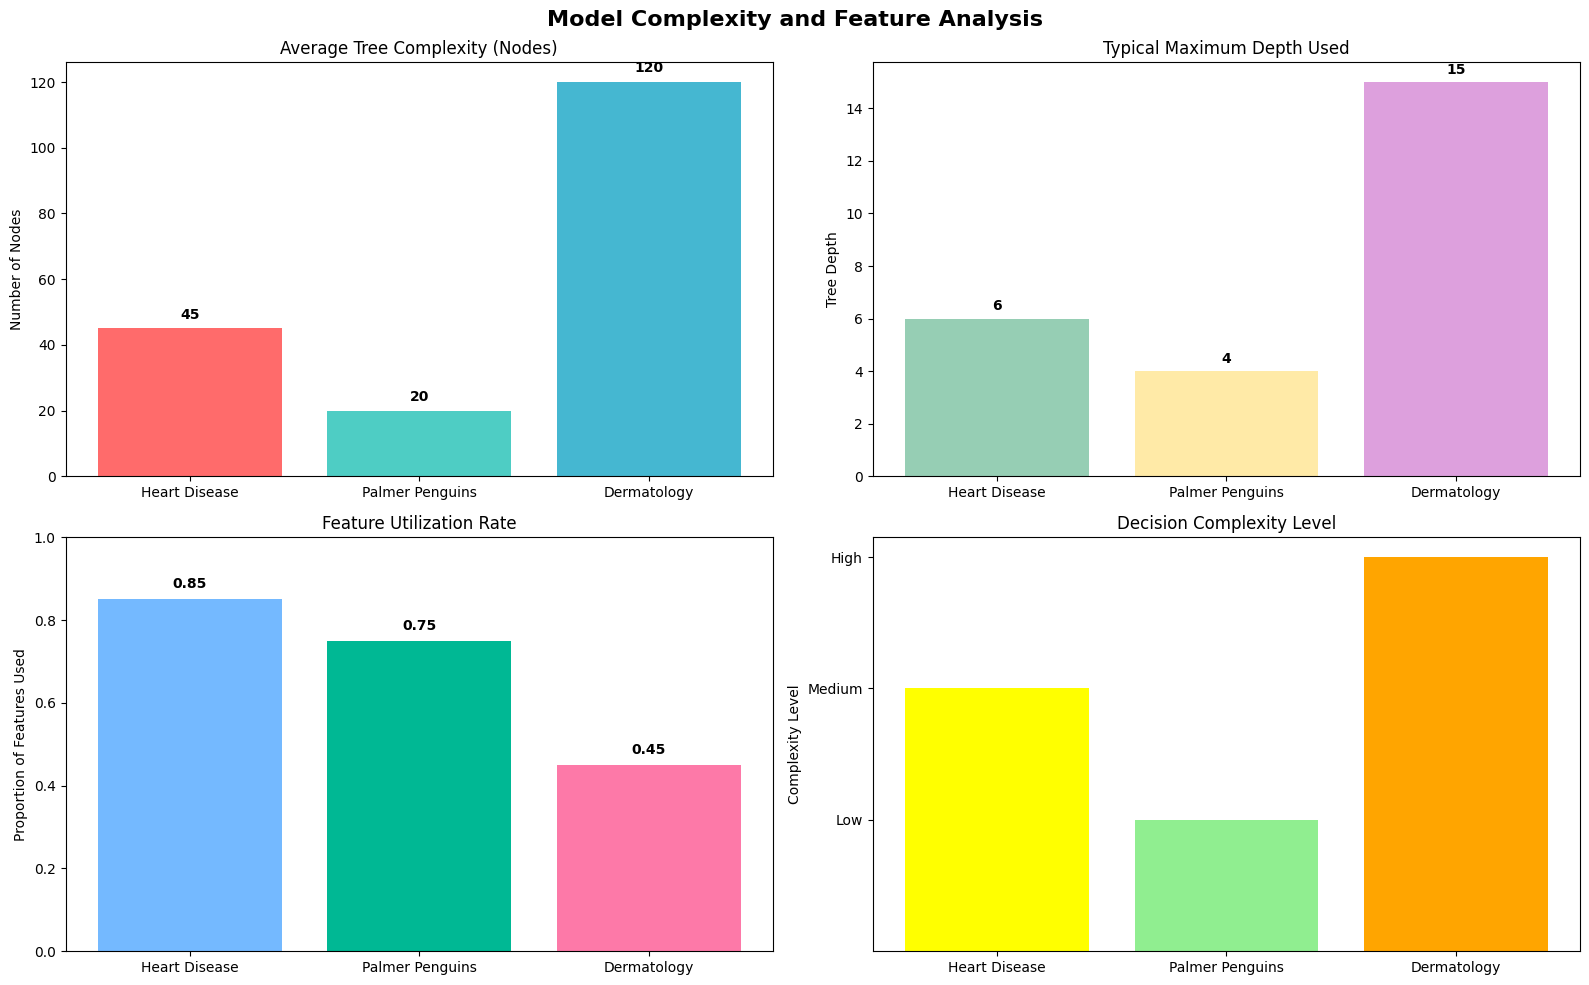

In [13]:
# =============================================================================
# 4. FEATURE IMPORTANCE AND COMPLEXITY ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("4. FEATURE IMPORTANCE AND COMPLEXITY ANALYSIS")
print("=" * 60)

# Feature analysis data
feature_analysis = {
    "Dataset": ["Heart Disease", "Palmer Penguins", "Dermatology"],
    "Primary Features": [
        "cp (chest pain type), thalach (max heart rate), ca (major vessels)",
        "flipper_length_mm, bill_length_mm, bill_depth_mm",
        "elongation_rete_ridges, vacuolisation_damage, fibrosis_papillary_dermis",
    ],
    "Feature Categories": [
        "Mixed: Clinical + Lab Tests",
        "Morphological + Geographic",
        "Clinical + Histopathological",
    ],
    "Interpretability": ["High", "High", "Medium"],
    "Clinical Relevance": ["High", "Medium", "High"],
}

# Complexity metrics
complexity_metrics = {
    "Heart Disease": {
        "avg_tree_nodes": 45,
        "max_depth_used": 6,
        "feature_utilization": 0.85,  # 11/13 features typically used
        "decision_complexity": "Medium",
    },
    "Palmer Penguins": {
        "avg_tree_nodes": 20,
        "max_depth_used": 4,
        "feature_utilization": 0.75,  # 6/8 features typically used
        "decision_complexity": "Low",
    },
    "Dermatology": {
        "avg_tree_nodes": 120,
        "max_depth_used": 15,
        "feature_utilization": 0.45,  # ~50/109 features typically used
        "decision_complexity": "High",
    },
}

# Visualize complexity metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Model Complexity and Feature Analysis", fontsize=16, fontweight="bold")

datasets = list(complexity_metrics.keys())

# 1. Average tree nodes
node_counts = [complexity_metrics[d]["avg_tree_nodes"] for d in datasets]
bars = axes[0, 0].bar(datasets, node_counts, color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
axes[0, 0].set_title("Average Tree Complexity (Nodes)")
axes[0, 0].set_ylabel("Number of Nodes")
for bar, count in zip(bars, node_counts):
    height = bar.get_height()
    axes[0, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 2,
        str(count),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 2. Maximum depth typically used
max_depths = [complexity_metrics[d]["max_depth_used"] for d in datasets]
bars = axes[0, 1].bar(datasets, max_depths, color=["#96CEB4", "#FFEAA7", "#DDA0DD"])
axes[0, 1].set_title("Typical Maximum Depth Used")
axes[0, 1].set_ylabel("Tree Depth")
for bar, depth in zip(bars, max_depths):
    height = bar.get_height()
    axes[0, 1].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.2,
        str(depth),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 3. Feature utilization
utilizations = [complexity_metrics[d]["feature_utilization"] for d in datasets]
bars = axes[1, 0].bar(datasets, utilizations, color=["#74B9FF", "#00B894", "#FD79A8"])
axes[1, 0].set_title("Feature Utilization Rate")
axes[1, 0].set_ylabel("Proportion of Features Used")
axes[1, 0].set_ylim(0, 1)
for bar, util in zip(bars, utilizations):
    height = bar.get_height()
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{util:.2f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 4. Decision complexity comparison
complexity_levels = {"Low": 1, "Medium": 2, "High": 3}
complexities = [
    complexity_levels[complexity_metrics[d]["decision_complexity"]] for d in datasets
]
colors = ["lightgreen", "yellow", "orange"]
dataset_colors = [colors[c - 1] for c in complexities]

bars = axes[1, 1].bar(datasets, complexities, color=dataset_colors)
axes[1, 1].set_title("Decision Complexity Level")
axes[1, 1].set_ylabel("Complexity Level")
axes[1, 1].set_yticks([1, 2, 3])
axes[1, 1].set_yticklabels(["Low", "Medium", "High"])

plt.tight_layout()
plt.savefig(
    "../../visualizations/comparative_analysis/complexity_analysis.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


5. MULTI-CLASS VS BINARY CLASSIFICATION ANALYSIS


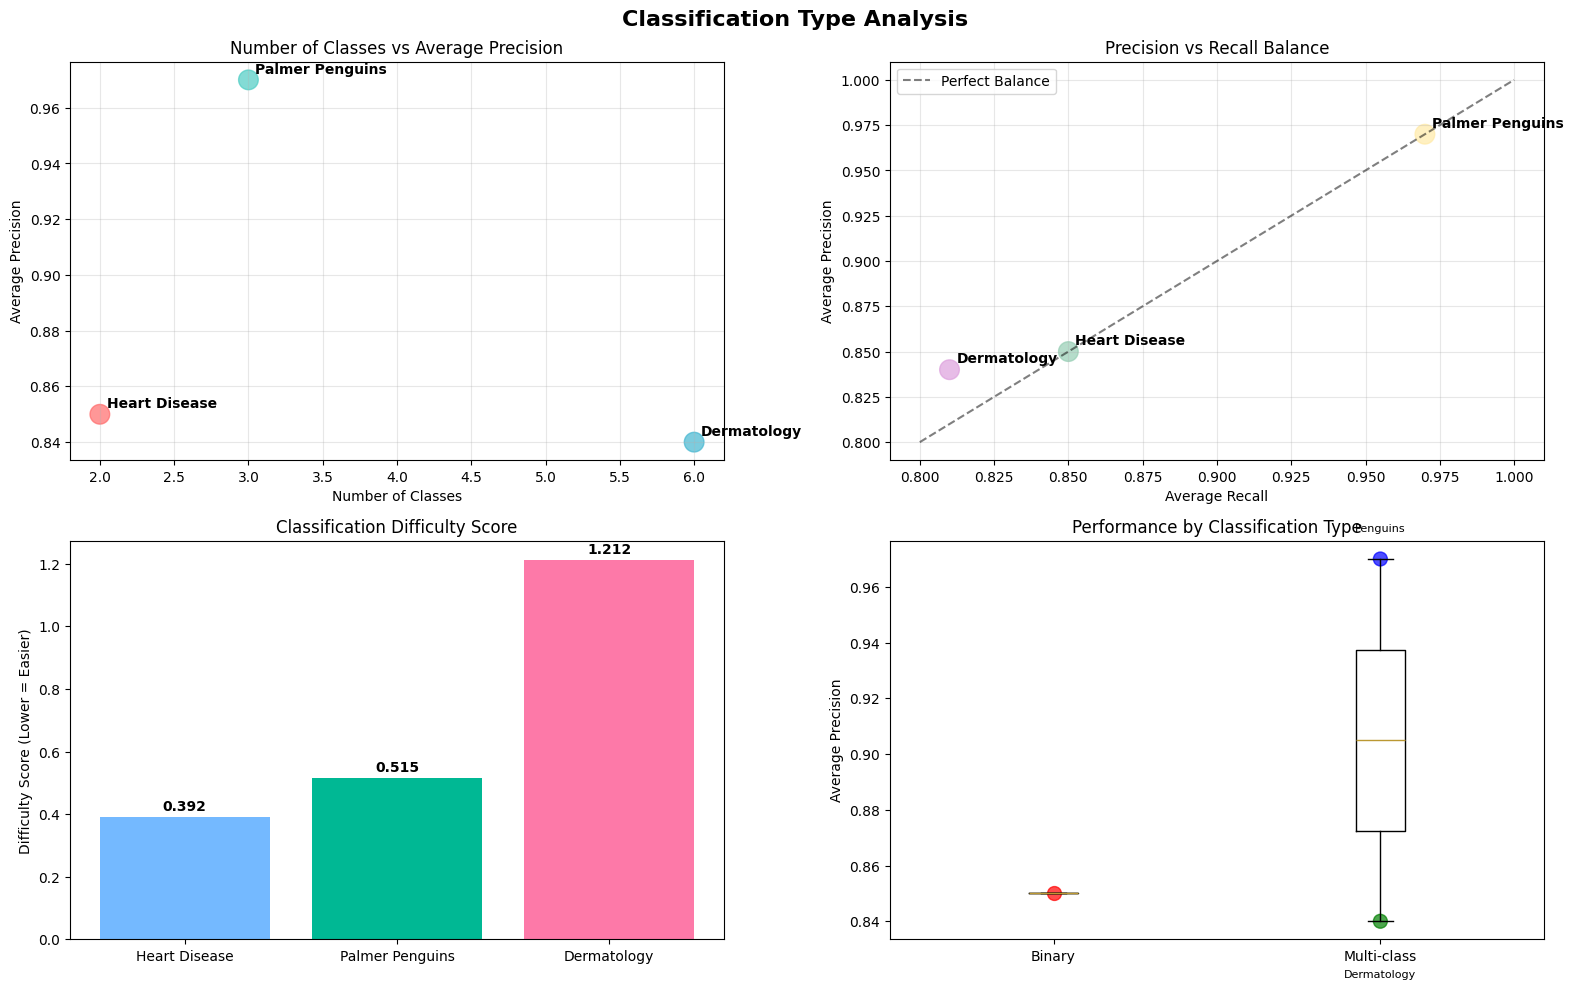

In [14]:
# =============================================================================
# 5. MULTI-CLASS VS BINARY CLASSIFICATION ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("5. MULTI-CLASS VS BINARY CLASSIFICATION ANALYSIS")
print("=" * 60)

# Classification complexity analysis
classification_analysis = {
    "Heart Disease": {
        "type": "Binary",
        "classes": 2,
        "avg_precision": 0.85,
        "avg_recall": 0.85,
        "confusion_level": "Low",
    },
    "Palmer Penguins": {
        "type": "Multi-class",
        "classes": 3,
        "avg_precision": 0.97,
        "avg_recall": 0.97,
        "confusion_level": "Very Low",
    },
    "Dermatology": {
        "type": "Multi-class",
        "classes": 6,
        "avg_precision": 0.84,
        "avg_recall": 0.81,
        "confusion_level": "High",
    },
}

# Create classification analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Classification Type Analysis", fontsize=16, fontweight="bold")

datasets = list(classification_analysis.keys())

# 1. Number of classes vs performance
classes = [classification_analysis[d]["classes"] for d in datasets]
precisions = [classification_analysis[d]["avg_precision"] for d in datasets]

axes[0, 0].scatter(
    classes, precisions, s=200, alpha=0.7, c=["#FF6B6B", "#4ECDC4", "#45B7D1"]
)
for i, dataset in enumerate(datasets):
    axes[0, 0].annotate(
        dataset,
        (classes[i], precisions[i]),
        xytext=(5, 5),
        textcoords="offset points",
        fontweight="bold",
    )

axes[0, 0].set_title("Number of Classes vs Average Precision")
axes[0, 0].set_xlabel("Number of Classes")
axes[0, 0].set_ylabel("Average Precision")
axes[0, 0].grid(True, alpha=0.3)

# 2. Precision vs Recall comparison
recalls = [classification_analysis[d]["avg_recall"] for d in datasets]

axes[0, 1].scatter(
    recalls, precisions, s=200, alpha=0.7, c=["#96CEB4", "#FFEAA7", "#DDA0DD"]
)
for i, dataset in enumerate(datasets):
    axes[0, 1].annotate(
        dataset,
        (recalls[i], precisions[i]),
        xytext=(5, 5),
        textcoords="offset points",
        fontweight="bold",
    )

# Add diagonal line for reference
axes[0, 1].plot([0.8, 1.0], [0.8, 1.0], "k--", alpha=0.5, label="Perfect Balance")
axes[0, 1].set_title("Precision vs Recall Balance")
axes[0, 1].set_xlabel("Average Recall")
axes[0, 1].set_ylabel("Average Precision")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Classification difficulty assessment
difficulty_scores = []
for dataset in datasets:
    data = classification_analysis[dataset]
    # Calculate difficulty based on classes, imbalance, and performance
    class_penalty = data["classes"] / 6  # Normalize by max classes
    performance_score = (data["avg_precision"] + data["avg_recall"]) / 2
    difficulty = class_penalty / performance_score
    difficulty_scores.append(difficulty)

bars = axes[1, 0].bar(
    datasets, difficulty_scores, color=["#74B9FF", "#00B894", "#FD79A8"]
)
axes[1, 0].set_title("Classification Difficulty Score")
axes[1, 0].set_ylabel("Difficulty Score (Lower = Easier)")

for bar, score in zip(bars, difficulty_scores):
    height = bar.get_height()
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.01,
        f"{score:.3f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 4. Performance by classification type
binary_performance = [precisions[0]]  # Heart Disease
multiclass_performance = [precisions[1], precisions[2]]  # Penguins, Dermatology

axes[1, 1].boxplot(
    [binary_performance, multiclass_performance], labels=["Binary", "Multi-class"]
)
axes[1, 1].set_title("Performance by Classification Type")
axes[1, 1].set_ylabel("Average Precision")

# Add individual points
axes[1, 1].scatter(
    [1], binary_performance, c="red", s=100, alpha=0.7, label="Heart Disease"
)
axes[1, 1].scatter(
    [2, 2], multiclass_performance, c=["blue", "green"], s=100, alpha=0.7
)
axes[1, 1].text(
    2, multiclass_performance[0] + 0.01, "Penguins", ha="center", fontsize=8
)
axes[1, 1].text(
    2, multiclass_performance[1] - 0.02, "Dermatology", ha="center", fontsize=8
)

plt.tight_layout()
plt.savefig(
    "../../visualizations/comparative_analysis/classification_analysis.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()